In [1]:
import pandas as pd
import glob

reports = glob.glob("../../results/reports/*.csv")

data_dt = pd.read_csv("../../results/reports/decision-tree-report.csv").to_dict()
data_svm = pd.read_csv("../../results/reports/svm-report.csv").to_dict()
data_xgb = pd.read_csv("../../results/reports/xgboost-report.csv").to_dict()

In [2]:
index = 0
data_benign = {
    'XGBoost Classifier': [x[index] for k, x in data_xgb.items() if k != 'Unnamed: 0' and k != 'support'],
    'Ada Boosted Decision Tree': [x[index] for k, x in data_dt.items() if k != 'Unnamed: 0' and k != 'support'],
    'SVM Classifier': [x[index] for k, x in data_svm.items() if k != 'Unnamed: 0' and k != 'support']
}

In [3]:
index = 1
data_malicious = {
    'XGBoost Classifier': [x[index] for k, x in data_xgb.items() if k != 'Unnamed: 0' and k != 'support'],
    'Ada Boosted Decision Tree': [x[index] for k, x in data_dt.items() if k != 'Unnamed: 0' and k != 'support'],
    'SVM Classifier': [x[index] for k, x in data_svm.items() if k != 'Unnamed: 0' and k != 'support']
}

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_datapoints(data_, title):
    data_points = ('Precision', 'Recall', 'F1-Score')
    
    x = np.arange(len(data_points))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0
    

    fig, ax = plt.subplots(layout='constrained')
    fig.set_size_inches(10, 8)
    for attribute, measurement in data_.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Value (%)')
    ax.set_title(title)
    ax.set_xticks(x + width, data_points)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 1.1)
    
    plt.show()

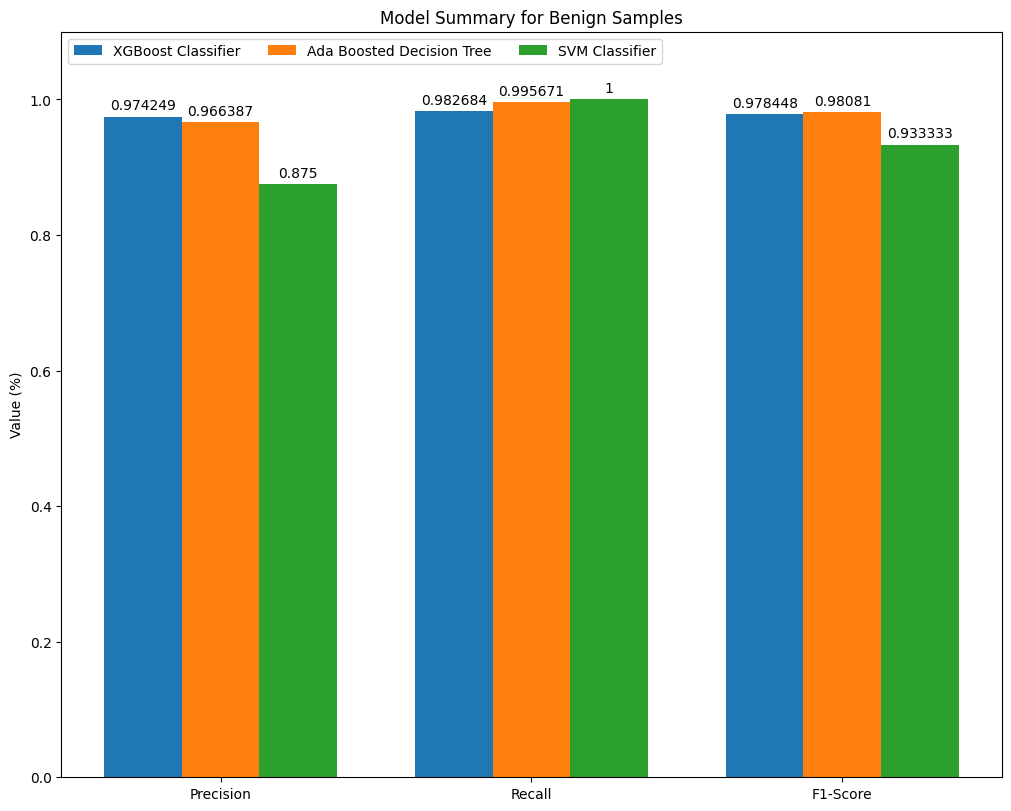

In [5]:
plot_datapoints(data_benign, 'Model Summary for Benign Samples')

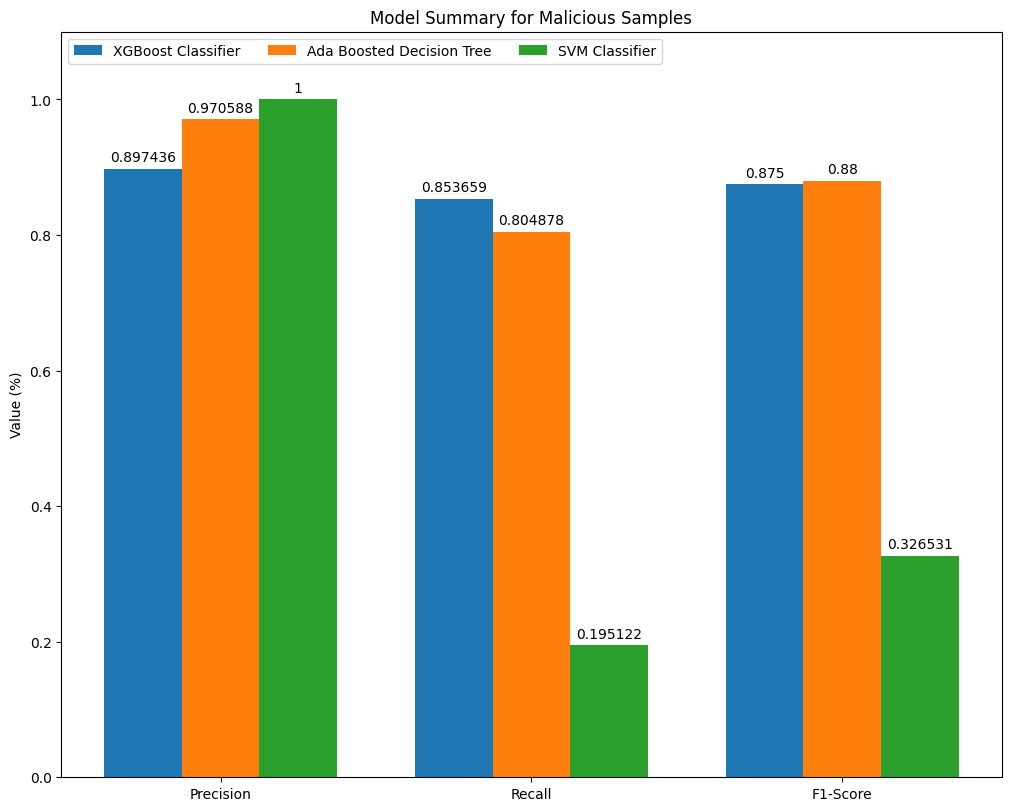

In [6]:
plot_datapoints(data_malicious, 'Model Summary for Malicious Samples')